<a href="https://colab.research.google.com/github/illambi/Python/blob/main/DataWrangling.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Workshop

In [2]:
import pandas as pd
import os
import matplotlib.pyplot as plt


In [3]:
from google.colab import drive
drive.mount('/content/gdrive')


Mounted at /content/gdrive


In [4]:
# Establecer ruta de acceso en drive
print(os.getcwd())
os.chdir("/content/gdrive/MyDrive/Fran")
print(os.getcwd())

/content
/content/gdrive/MyDrive/Fran


In [6]:
df = pd.read_csv('A872819.csv',sep=';', header=1)
df

,Fecha,Temperatura_Abrigo_150cm,Temperatura_Abrigo_150cm_Maxima,Temperatura_Abrigo_150cm_Minima,Temperatura_Intemperie_5cm_Minima,Temperatura_Intemperie_50cm_Minima,Temperatura_Suelo_5cm_Media,Temperatura_Suelo_10cm_Media,Temperatura_Inte_5cm,Temperatura_Intemperie_150cm_Minima,...,Duracion_Follaje_Mojado,Velocidad_Viento_200cm_Media,Direccion_Viento_200cm,Velocidad_Viento_1000cm_Media,Direccion_Viento_1000cm,Velocidad_Viento_Maxima,Presion_Media,Radiacion_Global,Horas_Frio,Unidades_Frio
0,2010-11-11 00:00:00.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,,NaN,,NaN,NaN,NaN,NaN,NaN
1,2010-11-12 00:00:00.0,14.10626,23.1,5.7,NaN,NaN,NaN,16.25625,NaN,NaN,...,NaN,NaN,,NaN,,NaN,NaN,NaN,2.822,-3.651998
2,2010-11-13 00:00:00.0,18.46319,26.7,12.0,NaN,NaN,NaN,18.33056,NaN,NaN,...,NaN,NaN,,NaN,,NaN,NaN,NaN,0.000,-11.703000
3,2010-11-14 00:00:00.0,16.00417,22.5,11.3,NaN,NaN,NaN,19.36319,NaN,NaN,...,NaN,NaN,,NaN,,NaN,NaN,NaN,0.000,-6.805998
4,2010-11-15 00:00:00.0,15.63611,22.1,12.3,NaN,NaN,NaN,19.44653,NaN,NaN,...,NaN,NaN,,NaN,,NaN,NaN,NaN,0.000,-8.216997
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
4346,2022-11-21 00:00:00.0,14.19236,15.8,13.0,NaN,NaN,NaN,17.35625,NaN,NaN,...,NaN,11.341670,S,14.177080,C,30.8,NaN,NaN,0.000,0.000000
4347,2022-11-22 00:00:00.0,15.33264,20.2,11.2,NaN,NaN,NaN,17.27015,NaN,NaN,...,NaN,6.004861,S,7.506076,C,26.5,NaN,NaN,0.000,-3.817994
4348,2022-11-23 00:00:00.0,19.90630,31.8,10.5,NaN,NaN,NaN,17.59580,NaN,NaN,...,NaN,11.844050,NW,14.805070,C,48.2,NaN,NaN,0.000,-12.450010
4349,2022-11-24 00:00:00.0,18.13889,31.4,10.4,NaN,NaN,NaN,18.21458,NaN,NaN,...,NaN,9.056942,S,11.321180,C,40.9,NaN,NaN,0.000,-7.137995


# Data Wrangling

In [7]:
# Verificacion de nulos total
sum(df.isnull().sum())

60198

In [9]:
# Verificacion de nulos por columna
df.isnull().sum()

Fecha                                     0
Temperatura_Abrigo_150cm                 28
Temperatura_Abrigo_150cm_Maxima          32
Temperatura_Abrigo_150cm_Minima          32
Temperatura_Intemperie_5cm_Minima      4351
Temperatura_Intemperie_50cm_Minima     4351
Temperatura_Suelo_5cm_Media            4351
Temperatura_Suelo_10cm_Media             58
Temperatura_Inte_5cm                   4351
Temperatura_Intemperie_150cm_Minima    4351
Humedad_Suelo                          4351
Precipitacion_Pluviometrica             248
Precipitacion_Cronologica               261
Precipitacion_Maxima_30minutos          212
Heliofania_Efectiva                    4351
Heliofania_Relativa                    4351
Tesion_Vapor_Media                      359
Humedad_Media                            30
Humedad_Media_8_14_20                   369
Rocio_Medio                             617
Duracion_Follaje_Mojado                4351
Velocidad_Viento_200cm_Media           3199
Direccion_Viento_200cm          

In [10]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 4351 entries, 0 to 4350
Data columns (total 30 columns):
 #   Column                               Non-Null Count  Dtype  
---  ------                               --------------  -----  
 0   Fecha                                4351 non-null   object 
 1   Temperatura_Abrigo_150cm             4323 non-null   float64
 2   Temperatura_Abrigo_150cm_Maxima      4319 non-null   float64
 3   Temperatura_Abrigo_150cm_Minima      4319 non-null   float64
 4   Temperatura_Intemperie_5cm_Minima    0 non-null      float64
 5   Temperatura_Intemperie_50cm_Minima   0 non-null      float64
 6   Temperatura_Suelo_5cm_Media          0 non-null      float64
 7   Temperatura_Suelo_10cm_Media         4293 non-null   float64
 8   Temperatura_Inte_5cm                 0 non-null      float64
 9   Temperatura_Intemperie_150cm_Minima  0 non-null      float64
 10  Humedad_Suelo                        0 non-null      float64
 11  Precipitacion_Pluviometrica   

In [8]:
print(df.shape)
#df= df.drop_duplicates()
#print(df.shape)

(4351, 30)


In [11]:
# Porcentaje de nulos por columna
# Ordenados por mayor cantidad de nulos
pd.set_option('display.max_rows', None)  # or 1000
serie = (df.isnull().sum() / df.shape[0])*100
serie = serie.sort_values(ascending=False)
serie = serie.loc[serie>0]
serie

Heliofania_Relativa                    100.000000
Radiacion_Global                       100.000000
Presion_Media                          100.000000
Temperatura_Intemperie_5cm_Minima      100.000000
Temperatura_Intemperie_50cm_Minima     100.000000
Temperatura_Suelo_5cm_Media            100.000000
Temperatura_Inte_5cm                   100.000000
Temperatura_Intemperie_150cm_Minima    100.000000
Humedad_Suelo                          100.000000
Duracion_Follaje_Mojado                100.000000
Heliofania_Efectiva                    100.000000
Velocidad_Viento_1000cm_Media           73.523328
Velocidad_Viento_200cm_Media            73.523328
Velocidad_Viento_Maxima                 73.477362
Rocio_Medio                             14.180648
Unidades_Frio                            9.147322
Humedad_Media_8_14_20                    8.480809
Tesion_Vapor_Media                       8.250977
Precipitacion_Cronologica                5.998621
Precipitacion_Pluviometrica              5.699839


<Axes: >

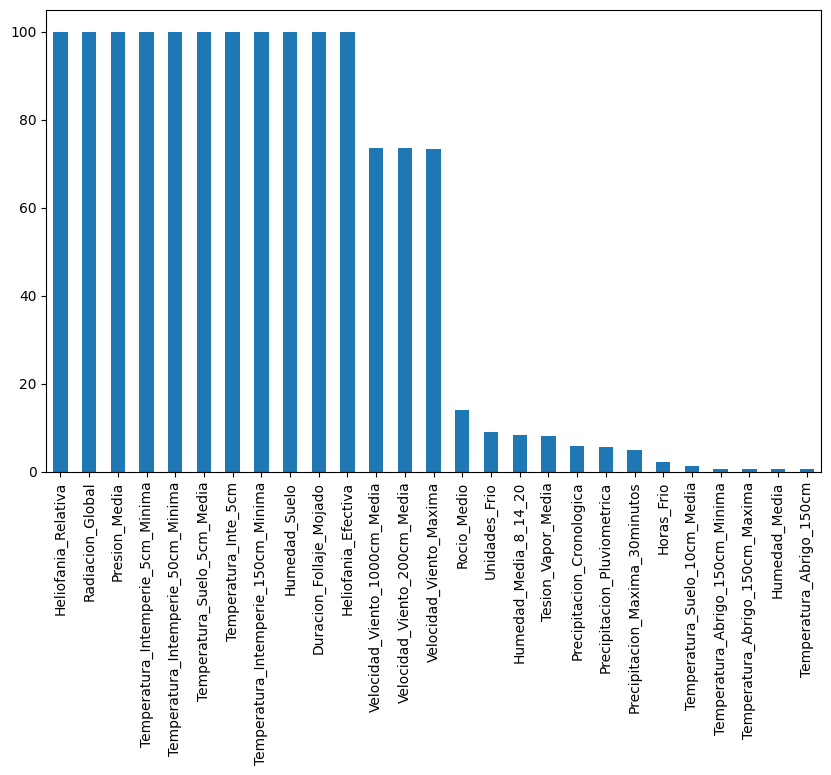

In [12]:
# Graficamente
import matplotlib.pyplot as plt
plt.figure(figsize=(10,6))
serie.plot(kind='bar')

In [18]:
percent_missing = df.isnull().sum() * 100 / len(df)
missing_value_df = pd.DataFrame({'Columnas': df.columns,
                                'Porcentaje_Missing': percent_missing})

# column in Descending Order
missing_value_df = missing_value_df.sort_values(by = 'Porcentaje_Missing', ascending = False)

missing_value_df

,Columnas,Porcentaje_Missing
Heliofania_Relativa,Heliofania_Relativa,100.000000
Radiacion_Global,Radiacion_Global,100.000000
Presion_Media,Presion_Media,100.000000
Temperatura_Intemperie_5cm_Minima,Temperatura_Intemperie_5cm_Minima,100.000000
Temperatura_Intemperie_50cm_Minima,Temperatura_Intemperie_50cm_Minima,100.000000
Temperatura_Suelo_5cm_Media,Temperatura_Suelo_5cm_Media,100.000000
Temperatura_Inte_5cm,Temperatura_Inte_5cm,100.000000
Temperatura_Intemperie_150cm_Minima,Temperatura_Intemperie_150cm_Minima,100.000000
Humedad_Suelo,Humedad_Suelo,100.000000
Duracion_Follaje_Mojado,Duracion_Follaje_Mojado,100.000000


In [24]:
missing_value_df.loc[missing_value_df < 15]

TypeError: ignored

In [16]:
serie.loc[serie < 15]
serie

Heliofania_Relativa                    100.000000
Radiacion_Global                       100.000000
Presion_Media                          100.000000
Temperatura_Intemperie_5cm_Minima      100.000000
Temperatura_Intemperie_50cm_Minima     100.000000
Temperatura_Suelo_5cm_Media            100.000000
Temperatura_Inte_5cm                   100.000000
Temperatura_Intemperie_150cm_Minima    100.000000
Humedad_Suelo                          100.000000
Duracion_Follaje_Mojado                100.000000
Heliofania_Efectiva                    100.000000
Velocidad_Viento_1000cm_Media           73.523328
Velocidad_Viento_200cm_Media            73.523328
Velocidad_Viento_Maxima                 73.477362
Rocio_Medio                             14.180648
Unidades_Frio                            9.147322
Humedad_Media_8_14_20                    8.480809
Tesion_Vapor_Media                       8.250977
Precipitacion_Cronologica                5.998621
Precipitacion_Pluviometrica              5.699839


In [23]:
serie.tolist()


[100.0,
 100.0,
 100.0,
 100.0,
 100.0,
 100.0,
 100.0,
 100.0,
 100.0,
 100.0,
 100.0,
 73.52332797058148,
 73.52332797058148,
 73.47736152608596,
 14.180648126867387,
 9.147322454608137,
 8.48080900942312,
 8.250976786945529,
 5.998621006665134,
 5.699839117444266,
 4.872443116524937,
 2.252355780280395,
 1.33302689037003,
 0.7354631119282923,
 0.7354631119282923,
 0.689496667432774,
 0.6435302229372558]

In [ ]:
# Decido que voy a quedarme con los datos que tienen menos del 15% de nulos

missing_value_df_f=missing_value_df[missing_value_df['Porcentaje_Missing']<=50]
missing_value_df_f

col_del=['PoolQC','MiscFeature','Alley','Fence','Id'] # Columnas a borrar que no aportan
